<a href="https://cognitiveclass.ai"></a>

<h1 align=center><font size = 5>Clustering the Neighbourhoods of Top Sales revenue generated cities in USA </font></h1>

## Importing the Necessary Modules

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

## 1. Download and Explore Dataset

#### Load and explore the data

Next, let's load the data.

In [5]:
df=pd.read_csv('us_companies.csv')

Let's take a quick look at the data.

In [6]:
df.head()

,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,company_category,revenue_source,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010.0,Washington,DC,us,20004.0,1-10,Private,Data/Technology,"Data analysis for clients, Database licensing,...","Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,NaN,NaN,NaN,[],"3 Round Stones is a profitable, self-funded, w...",2014-11-12 14:44:25.969871
1,48-factoring-inc,48 Factoring Inc.,https://www.48factoring.com,2014.0,Philadelphia,PA,us,19087.0,51-200,Private,Finance & Investment,Financial Services,Business to Business,Small Business Owners,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,11-50,Business,NaN,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN,2015-05-18 11:36:39.902880
2,5psolutions,5PSolutions,www.5psolutions.com,2007.0,Fairfax,VA,us,22003.0,1-10,Private,Data/Technology,"Subscriptions, User fees for web or mobile access","Business to Business, Business to Consumer, Bu...",NaN,"At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.,NaN,NaN,NaN,[],NaN,2014-11-12 15:09:35.485949
3,abt-associates,Abt Associates,abtassoc.com,1965.0,Cambridge,MA,us,2138.0,"1,001-5,000",Private,Research & Consulting,"Data analysis for clients, Database licensing",NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,2014-09-11 17:23:21.390289
4,accela,Accela,http://www.accela.com,1999.0,San Ramon,CA,us,94583.0,"501-1,000",Private,Governance,Not reported by company,Business to Consumer,"Citizen engagement and participation, Good gov...",Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...,101+,"Health/Healthcare, Housing, Public Safety",NaN,[],NaN,2014-09-16 16:30:49.172802


Notice how all the relevant data is in the *df* key, which is basically a list of all the company details. So, let' look at the columns

In [7]:
df.columns

Index(['company_name_id', 'company_name', 'url', 'year_founded', 'city',
       'state', 'country', 'zip_code', 'full_time_employees', 'company_type',
       'company_category', 'revenue_source', 'business_model', 'social_impact',
       'description', 'description_short', 'source_count', 'data_types',
       'example_uses', 'data_impacts', 'financial_info', 'last_updated'],
      dtype='object')

Let's take a look at the first  5 item in this list.

In [8]:
df.head()

,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,company_category,revenue_source,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010.0,Washington,DC,us,20004.0,1-10,Private,Data/Technology,"Data analysis for clients, Database licensing,...","Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,NaN,NaN,NaN,[],"3 Round Stones is a profitable, self-funded, w...",2014-11-12 14:44:25.969871
1,48-factoring-inc,48 Factoring Inc.,https://www.48factoring.com,2014.0,Philadelphia,PA,us,19087.0,51-200,Private,Finance & Investment,Financial Services,Business to Business,Small Business Owners,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,11-50,Business,NaN,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN,2015-05-18 11:36:39.902880
2,5psolutions,5PSolutions,www.5psolutions.com,2007.0,Fairfax,VA,us,22003.0,1-10,Private,Data/Technology,"Subscriptions, User fees for web or mobile access","Business to Business, Business to Consumer, Bu...",NaN,"At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.,NaN,NaN,NaN,[],NaN,2014-11-12 15:09:35.485949
3,abt-associates,Abt Associates,abtassoc.com,1965.0,Cambridge,MA,us,2138.0,"1,001-5,000",Private,Research & Consulting,"Data analysis for clients, Database licensing",NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,2014-09-11 17:23:21.390289
4,accela,Accela,http://www.accela.com,1999.0,San Ramon,CA,us,94583.0,"501-1,000",Private,Governance,Not reported by company,Business to Consumer,"Citizen engagement and participation, Good gov...",Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...,101+,"Health/Healthcare, Housing, Public Safety",NaN,[],NaN,2014-09-16 16:30:49.172802


In [10]:
df['company_type'].value_counts()

Private                           396
Public                             92
Nonprofit                          15
partnership                         4
Partnership                         2
Public (Federal-USGS)               1
nonprofit + commercial spinoff      1
Permitting Assistance               1
sole proprietorship                 1
Name: company_type, dtype: int64

#### Tranform the data into a *processable* dataframe

The next task is essentially transforming this data into a  *processable* dataframe. So let's start

#### Replace the Mismatch Values

Data/Technology and Housing/Real Estate columns has similar type of entries and can be differentiated only by , values

In [11]:
df.replace(to_replace='Partnership',value='partnership',inplace=True)

In [12]:
df['company_type'].value_counts()

Private                           396
Public                             92
Nonprofit                          15
partnership                         6
Public (Federal-USGS)               1
nonprofit + commercial spinoff      1
Permitting Assistance               1
sole proprietorship                 1
Name: company_type, dtype: int64

#### Visualize the different company categories and their count using bar chart

I have created new data frame that contains the value count of each values in company_category column

In [13]:
catego=df['company_type'].value_counts().to_frame()

In [14]:
catego.reset_index(inplace=True)

In [15]:
catego.head()

,index,company_type
0,Private,396
1,Public,92
2,Nonprofit,15
3,partnership,6
4,Public (Federal-USGS),1


In [16]:
catego.rename(columns={'index':'company_type','company_type':'count'},inplace=True)

In [17]:
import matplotlib.pyplot as plt

### Lets create a barchar and visualize it 

<BarContainer object of 8 artists>

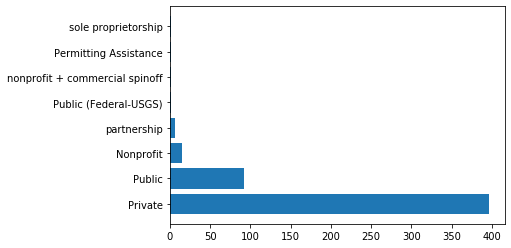

In [18]:
plt.barh(catego['company_type'],catego['count'])

In [19]:
catego.head()

,company_type,count
0,Private,396
1,Public,92
2,Nonprofit,15
3,partnership,6
4,Public (Federal-USGS),1


### Remove the unnecessary info that is not needed when we process the data frame

In [20]:
df.columns

Index(['company_name_id', 'company_name', 'url', 'year_founded', 'city',
       'state', 'country', 'zip_code', 'full_time_employees', 'company_type',
       'company_category', 'revenue_source', 'business_model', 'social_impact',
       'description', 'description_short', 'source_count', 'data_types',
       'example_uses', 'data_impacts', 'financial_info', 'last_updated'],
      dtype='object')

In [21]:
df.drop(columns=['company_name_id','url','country','social_impact','last_updated','source_count','description_short','social_impact','example_uses'],inplace=True)

In [19]:
df.head()

,company_name,year_founded,city,state,zip_code,full_time_employees,company_type,company_category,revenue_source,business_model,description,data_types,data_impacts,financial_info
0,"3 Round Stones, Inc.",2010.0,Washington,DC,20004.0,1-10,Private,Data/Technology,"Data analysis for clients, Database licensing,...","Business to Business, Business to Consumer",3 Round Stones produces a platform for publish...,NaN,[],"3 Round Stones is a profitable, self-funded, w..."
1,48 Factoring Inc.,2014.0,Philadelphia,PA,19087.0,51-200,Private,Finance & Investment,Financial Services,Business to Business,The company mission is to provide finance to s...,Business,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN
2,5PSolutions,2007.0,Fairfax,VA,22003.0,1-10,Private,Data/Technology,"Subscriptions, User fees for web or mobile access","Business to Business, Business to Consumer, Bu...","At 5PSolutions, we wish to make all basic info...",NaN,[],NaN
3,Abt Associates,1965.0,Cambridge,MA,2138.0,"1,001-5,000",Private,Research & Consulting,"Data analysis for clients, Database licensing",NaN,"Abt Associates is a mission-driven, internatio...",NaN,[],Employee-owned company. $552M/year.
4,Accela,1999.0,San Ramon,CA,94583.0,"501-1,000",Private,Governance,Not reported by company,Business to Consumer,Accela powers thousands of services and millio...,"Health/Healthcare, Housing, Public Safety",[],NaN


In [22]:
df.drop(columns=['financial_info','data_types','description'],inplace=True)

### Drop rows that contains NAN Values 

Our main column is city and company. Since the number of rows that has NAN values in these columns are less, we can simply remove those rows

In [23]:
df.dropna(subset=['company_type','city'],axis=0,inplace=True)

In [24]:
df.isnull().sum(axis=0)

company_name            0
year_founded            0
city                    0
state                   0
zip_code               11
full_time_employees    17
company_type            0
company_category        3
revenue_source          6
business_model         66
data_impacts            0
dtype: int64

In [25]:
df.shape

(485, 11)

In [26]:
df.columns

Index(['company_name', 'year_founded', 'city', 'state', 'zip_code',
       'full_time_employees', 'company_type', 'company_category',
       'revenue_source', 'business_model', 'data_impacts'],
      dtype='object')

### Creating new *Features* data frame that is  Company_data

In [28]:
company_data=df[['company_name','city','state','company_type','company_category']]

In [29]:
company_data.head()

,company_name,city,state,company_type,company_category
0,"3 Round Stones, Inc.",Washington,DC,Private,Data/Technology
1,48 Factoring Inc.,Philadelphia,PA,Private,Finance & Investment
2,5PSolutions,Fairfax,VA,Private,Data/Technology
3,Abt Associates,Cambridge,MA,Private,Research & Consulting
4,Accela,San Ramon,CA,Private,Governance


In [30]:
company_data[['typeLabel']]=company_data[['company_type']]

C:\Users\welcome\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [31]:
company_data.head()

,company_name,city,state,company_type,company_category,typeLabel
0,"3 Round Stones, Inc.",Washington,DC,Private,Data/Technology,Private
1,48 Factoring Inc.,Philadelphia,PA,Private,Finance & Investment,Private
2,5PSolutions,Fairfax,VA,Private,Data/Technology,Private
3,Abt Associates,Cambridge,MA,Private,Research & Consulting,Private
4,Accela,San Ramon,CA,Private,Governance,Private


In [32]:
company_data['company_type'].unique()

array(['Private', 'Public', 'partnership', 'Nonprofit',
       'Public (Federal-USGS)', 'nonprofit + commercial spinoff',
       'sole proprietorship'], dtype=object)

In [33]:
company_data.columns

Index(['company_name', 'city', 'state', 'company_type', 'company_category',
       'typeLabel'],
      dtype='object')

In [34]:
company_data['typeLabel'].astype(str)

0                             Private
1                             Private
2                             Private
3                             Private
4                             Private
5                              Public
6                             Private
7                              Public
8                             Private
9                              Public
10                            Private
11                            Private
12                             Public
13                            Private
14                             Public
15                            Private
16                            Private
17                             Public
18                            Private
19                            Private
20                            Private
21                            Private
22                            Private
24                            Private
26                            Private
27                            Private
28          

#### Changing Categorical values into Numerical Values for easy processing

In [35]:
company_data['typeLabel'].replace(to_replace=['Private', 'Public', 'partnership', 'Nonprofit',
       'Public (Federal-USGS)', 'nonprofit + commercial spinoff',
       'sole proprietorship'],value=[0,1,2,3,4,5,6],inplace=True)

C:\Users\welcome\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [36]:
company_data.head()

,company_name,city,state,company_type,company_category,typeLabel
0,"3 Round Stones, Inc.",Washington,DC,Private,Data/Technology,0
1,48 Factoring Inc.,Philadelphia,PA,Private,Finance & Investment,0
2,5PSolutions,Fairfax,VA,Private,Data/Technology,0
3,Abt Associates,Cambridge,MA,Private,Research & Consulting,0
4,Accela,San Ramon,CA,Private,Governance,0


In [37]:
company_data['typeLabel'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

## Getting Location data Using OpenCase library

#### Installing the Open Case Package

In [38]:
pip install opencage

Note: you may need to restart the kernel to use updated packages.


In [39]:
from opencage.geocoder import OpenCageGeocode

### Getting the Key Value

In [40]:
key ='c586471a73ac4ffd8ade18771ea15dc2'
geocoder = OpenCageGeocode(key)

In [41]:
company_data['state'].unique()

array(['DC', 'PA', 'VA', 'MA', 'CA', 'IL', 'AR', 'NY', 'WA', 'IN', 'RI',
       'TX', 'NC', 'NE', 'WI', 'GA', 'CT', 'TN', 'MO', 'OH', 'NJ', 'CO',
       'MD', 'MI', 'UT', 'FL', 'OR', 'KA', 'MT', 'AZ', 'ME', 'VT', 'MN',
       'NH', 'AL', 'NV', 'OK', 'IA', 'KY'], dtype=object)

### Using GeoCode function, Getting the Location Deatils and Printing it

In [42]:
City='Washington'
State='DC'
query = str(City)+','+str(State)
results = geocoder.geocode(query)   
lat = results[0]['geometry']['lat']
long = results[0]['geometry']['lng']
print(lat)
print(long)

38.8948932
-77.0365529


### Getting the location details of all the companies and adding the location columns

In [43]:
list_lat = []   # create empty lists

list_long = []


for index, row in company_data.iterrows(): # iterate over rows in dataframe
    City = row['city']
    State = row['state']       
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)

print('Completed')
# create new columns from lists    

#company_data['lat'] = list_lat   

#company_data['lon'] = list_long

Completed


In [44]:
company_data['lat'] = list_lat   

company_data['lon'] = list_long

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
company_data.head()

,company_name,city,state,company_type,company_category,typeLabel,lat,lon
0,"3 Round Stones, Inc.",Washington,DC,Private,Data/Technology,0,38.894893,-77.036553
1,48 Factoring Inc.,Philadelphia,PA,Private,Finance & Investment,0,39.952724,-75.163526
2,5PSolutions,Fairfax,VA,Private,Data/Technology,0,38.846224,-77.306373
3,Abt Associates,Cambridge,MA,Private,Research & Consulting,0,42.375100,-71.105616
4,Accela,San Ramon,CA,Private,Governance,0,37.779927,-121.978015


### Creating a map for US 

In [46]:
latitude=37.0902
longitude=-95.7129

In [47]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=4)
map_newyork

### Clustering different domain companies into different clusters and visualize the map

In [49]:
map_comp = folium.Map(location=[latitude, longitude], zoom_start=5)
kclusters=18
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon,company_name,cluster in zip(company_data['lat'], company_data['lon'], company_data['company_name'],company_data['typeLabel']):
    label = folium.Popup(str(company_name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_comp)
       
map_comp

###  Visualizing the locations of all the data/technology companies alone in the map

In [50]:
map_comp1 = folium.Map(location=[latitude, longitude], zoom_start=5)
kclusters=7
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon,company_name,cluster in zip(company_data['lat'], company_data['lon'], company_data['company_name'],company_data['typeLabel']):
    if(cluster==0):
        label = folium.Popup(str(company_name) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_comp1)
map_comp1

Quickly examine the resulting dataframe.

In [51]:
company_data.columns

Index(['company_name', 'city', 'state', 'company_type', 'company_category',
       'typeLabel', 'lat', 'lon'],
      dtype='object')

## Creating new data frame and storing only the data/technology company details in it

In [52]:
austin_data=company_data[company_data['company_type']=='Public'].reset_index(drop=True)
austin_data.head(10)

,company_name,city,state,company_type,company_category,typeLabel,lat,lon
0,Accenture,Chicago,IL,Public,NaN,1,41.875562,-87.624421
1,Acxiom,Little Rock,AR,Public,Data/Technology,1,34.746481,-92.289595
2,Adobe Digital Government,San Jose,CA,Public,Data/Technology,1,37.336191,-121.890583
3,Allianz,New York,NY,Public,Finance & Investment,1,40.712728,-74.006015
4,AllState Insurance Group,Northbrook,IL,Public,Insurance,1,42.129923,-87.829948
5,Amazon Web Services,Seattle,WA,Public,Data/Technology,1,47.603832,-122.330062
6,Berkshire Hathaway,Omaha,NE,Public,Finance & Investment,1,41.258746,-95.938376
7,Biovia,San Diego,CA,Public,Scientific Research,1,32.717421,-117.162771
8,BlackRock,Atlanta,GA,Public,Finance & Investment,1,33.749099,-84.390185
9,Booz Allen Hamilton,McLean,VA,Public,Research & Consulting,1,38.934289,-77.177633


#### Just checking for one row

In [53]:
latti=austin_data.loc[0,'lat']
longi=austin_data.loc[0,'lon']

city_name=austin_data.loc[0,'city']
print(latti,longi,city_name)

41.8755616 -87.6244212 Chicago


## Connecting to Four Square API

In [65]:
CLIENT_ID = 'KQO1I1FOF0JGV3MC3SB24GDDGO0K5QKQDPHW23ZIPCVIBBGB' # your Foursquare ID
CLIENT_SECRET = 'SU3NPYWIEJIBHDNADBFQW1K2AHFBNGXYFIX2AGIVIPZTHDT1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KQO1I1FOF0JGV3MC3SB24GDDGO0K5QKQDPHW23ZIPCVIBBGB
CLIENT_SECRET:SU3NPYWIEJIBHDNADBFQW1K2AHFBNGXYFIX2AGIVIPZTHDT1


In [66]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latti, 
    longi, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=KQO1I1FOF0JGV3MC3SB24GDDGO0K5QKQDPHW23ZIPCVIBBGB&client_secret=SU3NPYWIEJIBHDNADBFQW1K2AHFBNGXYFIX2AGIVIPZTHDT1&v=20180605&ll=41.8755616,-87.6244212&radius=500&limit=100'

### Getting the neighbourhood details using Four Square API

In [67]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d958d5453159300308a9165'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'South Loop',
  'headerFullLocation': 'South Loop, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 115,
  'suggestedBounds': {'ne': {'lat': 41.8800616045, 'lng': -87.61838893486689},
   'sw': {'lat': 41.871061595499995, 'lng': -87.63045346513312}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ae786a5f964a52019ac21e3',
       'name': 'Auditorium Theatre',
       'location': {'address': '50 E Congress Pkwy',
        'crossStreet': 'Roosevelt University',
        'lat': 41.87605807115569,
        'lng': -

### Categorizing the Neighbourhood venues

In [68]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [69]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Auditorium Theatre,Theater,41.876058,-87.625303
1,Cafecito,Cuban Restaurant,41.875724,-87.626386
2,Osaka Sushi Express & Fresh Fruit Smoothies,Sushi Restaurant,41.876969,-87.624534
3,Hostelling International Chicago,Hostel,41.875757,-87.626537
4,Dunkin',Donut Shop,41.876768,-87.624575
5,SummerDance,Dance Studio,41.873804,-87.623335
6,Fontano's Pizza and Subs,Pizza Place,41.877157,-87.624348
7,Supercuts,Salon / Barbershop,41.877530,-87.624392
8,Fine Arts Building,General Entertainment,41.876511,-87.624234
9,Auditorium Building,Concert Hall,41.875858,-87.624565


**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

#### Creating a New Map and visualizing only the data/technology companies locations in the map

In [70]:
# create map of Manhattan using latitude and longitude values
map_comp3 = folium.Map(location=[latti, longi], zoom_start=4)

# add markers to map
for lat, lng, label in zip(austin_data['lat'], austin_data['lon'], austin_data['city']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_comp3)  
    
map_comp3

### Get Near By Venues of all the data science companies

In [71]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [72]:
comp_venues = getNearbyVenues(names=austin_data['city'],
                                   latitudes=austin_data['lat'],
                                   longitudes=austin_data['lon']
                                  )

Chicago
Little Rock
San Jose
New York
Northbrook
Seattle
Omaha
San Diego
Atlanta
McLean
Palo Alto
Melville
North Kansas City
New York
San Francisco
Warren
New York
New York City
San Francisco
Ann Arbor
Irvine
New York
New York
Short Hills
Hopkinton
Falls Church
Plano
Atlanta
Costa Mesa
Norwalk
Los Angeles
Cambridge
Sugar Land
Olathe
Mountain View
Mountain View
Melbourne
Armonk
Chicago
Danbury
Redwood City
Englewood
Scotsdale
Denver
New York
Washington
New York
San Francisco
Denver
New York
New York
New York
Redmond
Mountain View
New York
New York
Chicago
Emeryville
New York
Warren
Seattle
Eden Prairie
New York
Paramus
Seattle
Mayfield Village
Chicago
San Jose
San Jose
New York
Newtown Square
San Francisco
Baltimore
Seattle
Sunnyvale
Dayton
New York
San Francisco
Brentwood
Atlanta
New York
Jericho
Minneapolis
Sunnyvale
San Francisco
Seattle
Schaumburg


In [73]:
comp_venues.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chicago,41.875562,-87.624421,Auditorium Theatre,41.876058,-87.625303,Theater
1,Chicago,41.875562,-87.624421,Cafecito,41.875724,-87.626386,Cuban Restaurant
2,Chicago,41.875562,-87.624421,Osaka Sushi Express & Fresh Fruit Smoothies,41.876969,-87.624534,Sushi Restaurant
3,Chicago,41.875562,-87.624421,Hostelling International Chicago,41.875757,-87.626537,Hostel
4,Chicago,41.875562,-87.624421,Dunkin',41.876768,-87.624575,Donut Shop


In [59]:
comp_venues.groupby('City').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Arlington,64,64,64,64,64,64
Armonk,26,26,26,26,26,26
Austin,76,76,76,76,76,76
Bethesda,100,100,100,100,100,100
Beverly,16,16,16,16,16,16
Boston,300,300,300,300,300,300
Cary,47,47,47,47,47,47
Champaign,44,44,44,44,44,44
Chicago,300,300,300,300,300,300


### Doing on ehot encoding to convert categorical values into numerical columns

In [74]:
# one hot encoding
comp_onehot = pd.get_dummies(comp_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
comp_onehot['City'] = comp_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [comp_onehot.columns[-1]] + list(comp_onehot.columns[:-1])
comp_onehot = comp_onehot[fixed_columns]

comp_onehot.head()

,City,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Country Dance Club,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Knitting Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lawyer,Leather Goods Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Motorsports Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pop-Up Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Trail,Train,Train Station,Travel Lounge,Turkish Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Chi

In [75]:
comp_grouped = comp_onehot.groupby('City').mean().reset_index()
comp_grouped.head()

,City,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Country Dance Club,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Knitting Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lawyer,Leather Goods Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Motorsports Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pop-Up Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Trail,Train,Train Station,Travel Lounge,Turkish Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Ann

### Writing a function to return most common venues

In [76]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [77]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = comp_grouped['City']

for ind in np.arange(comp_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(comp_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ann Arbor,Yoga Studio,Park,Deli / Bodega,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food
1,Armonk,American Restaurant,Italian Restaurant,Deli / Bodega,Bank,Salad Place,Bagel Shop,Bakery,Coffee Shop,Restaurant,Pizza Place
2,Atlanta,Rental Car Location,Breakfast Spot,American Restaurant,Caribbean Restaurant,Music Venue,Event Space,Intersection,Art Gallery,College Basketball Court,Yoga Studio
3,Baltimore,American Restaurant,Clothing Store,Hotel,Coffee Shop,Convenience Store,Sandwich Place,Salad Place,Lingerie Store,Café,Fast Food Restaurant
4,Brentwood,Furniture / Home Store,Mexican Restaurant,BBQ Joint,Burger Joint,Spa,Breakfast Spot,Supermarket,Szechuan Restaurant,Taco Place,Juice Bar


## Clustering the data science compaies in US based on the top venues list

In [78]:
kclusters = 8

comp_grouped_clustering = comp_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(comp_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 3, 3, 3, 3, 0, 3, 3, 3, 3])

In [79]:
#neighborhoods_venues_sorted.drop(columns=['Cluster Labels'],inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

comp_merged = austin_data
comp_merged.rename(columns={'city':'City'},inplace=True)
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
comp_merged = comp_merged.join(neighborhoods_venues_sorted.set_index('City'), on='City')

comp_merged['Cluster Labels'].unique()

array([ 3.,  4.,  5.,  2.,  0.,  1., nan,  6.,  7.])

In [80]:
comp_merged.shape

(87, 19)

In [81]:
comp_merged.dropna(subset=['Cluster Labels'],axis=0,inplace=True)

In [82]:
comp_merged.shape

(84, 19)

### Visualize the clustered companies locations using folium map

In [83]:
map_clusters = folium.Map(location=[latti, longi], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(comp_merged['lat'], comp_merged['lon'], comp_merged['City'], comp_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##  Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [84]:
comp_merged.loc[comp_merged['Cluster Labels'] == 0, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,typeLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Hopkinton,1,42.228843,-71.519553,0.0,Pharmacy,Market,Sandwich Place,Thai Restaurant,Coffee Shop,Athletics & Sports,Racetrack,Café,Hot Dog Joint,Pizza Place
31,Cambridge,1,42.375100,-71.105616,0.0,Pub,Grocery Store,Park,Coffee Shop,Pharmacy,Pizza Place,Indian Restaurant,Thai Restaurant,Music Venue,Tapas Restaurant


#### Cluster 2

In [85]:
comp_merged.loc[comp_merged['Cluster Labels'] == 1, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,typeLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Plano,1,33.013676,-96.69251,1.0,Business Service,Gym / Fitness Center,Fondue Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Yoga Studio


#### Cluster 3

In [86]:
comp_merged.loc[comp_merged['Cluster Labels'] == 2, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,typeLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Short Hills,1,40.747879,-74.325427,2.0,Business Service,Boutique,Yoga Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop


#### Cluster 4

In [87]:
comp_merged.loc[comp_merged['Cluster Labels'] == 3, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,typeLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chicago,1,41.875562,-87.624421,3.0,Coffee Shop,Sandwich Place,Pub,Museum,Hotel,Donut Shop,Bookstore,Pizza Place,Theater,Dance Studio
1,Little Rock,1,34.746481,-92.289595,3.0,Sandwich Place,Gym,Southern / Soul Food Restaurant,Train Station,Office,Café,Government Building,Liquor Store,Fish & Chips Shop,Farm
2,San Jose,1,37.336191,-121.890583,3.0,Mexican Restaurant,Sandwich Place,Cocktail Bar,Pub,Sushi Restaurant,Restaurant,Coffee Shop,Ice Cream Shop,Bar,Korean Restaurant
3,New York,1,40.712728,-74.006015,3.0,Coffee Shop,Sandwich Place,Café,Hotel,Falafel Restaurant,Park,Gym,Italian Restaurant,Sporting Goods Shop,Spa
4,Northbrook,1,42.129923,-87.829948,3.0,Italian Restaurant,Bank,Ice Cream Shop,Coffee Shop,American Restaurant,Bookstore,Sushi Restaurant,Breakfast Spot,Café,Shopping Mall
5,Seattle,1,47.603832,-122.330062,3.0,Hotel,Coffee Shop,Café,Cocktail Bar,Sandwich Place,Salad Place,Japanese Restaurant,Park,New American Restaurant,Nightclub
6,Omaha,1,41.258746,-95.938376,3.0,Sandwich Place,Hotel,Steakhouse,American Restaurant,Café,ATM,Food Court,Bar,Gastropub,Coffee Shop
7,San Diego,1,32.717421,-117.162771,3.0,Hotel,Coffee Shop,Mexican Restaurant,Italian Restaurant,Seafood Restaurant,American Restaurant,Clothing Store,Bakery,Bar,Taco Place
8,Atlanta,1,33.749099,-84.390185,3.0,Rental Car Location,Breakfast Spot,American Restaurant,Caribbean Restaurant,Music Venue,Event Space,Intersection,Art Gallery,College Basketball Court,Yoga Studio
9,McLean,1,38.934289,-77.177633,3.0,Italian Restaurant,Sushi Restaurant,Gym / Fitness Center,Café,Chinese Restaurant,Coffee Shop,Pizza Place,Convenience Store,Bank,Grocery Store


#### Cluster 5

In [88]:
comp_merged.loc[comp_merged['Cluster Labels'] == 4, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,typeLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Ann Arbor,1,42.268157,-83.731229,4.0,Yoga Studio,Park,Deli / Bodega,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food


#### Cluster 6

In [89]:
comp_merged.loc[comp_merged['Cluster Labels'] == 5, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,typeLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Irvine,1,49.958444,-110.273261,5.0,Hotel Bar,Convenience Store,General Travel,Hockey Arena,History Museum,Food & Drink Shop,Food Court,Food Service,Food,Falafel Restaurant


#### Cluster 7

In [90]:
comp_merged.loc[comp_merged['Cluster Labels'] == 6, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,typeLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,Emeryville,1,42.29766,-82.761358,6.0,Chocolate Shop,Bar,Coffee Shop,Yoga Studio,Flower Shop,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Fondue Restaurant


#### Cluster 8

In [91]:
comp_merged.loc[comp_merged['Cluster Labels'] == 7, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

,City,typeLabel,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,Eden Prairie,1,44.854686,-93.470786,7.0,Food,Home Service,Fondue Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Yoga Studio


## Thank You